In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

In [78]:
raw = pd.read_csv('../../../../datasets/paris_listings.csv')
df = raw.copy()

In [79]:
df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})

df['url'] = raw['listing_url']

df['숙소_특징']= raw['property_type']

In [80]:
df['숙소_수'].unique().round(2)

array([2.000e+00, 1.000e+00, 3.000e+00, 9.000e+00, 4.000e+00, 2.470e+02,
       5.000e+00, 7.000e+00, 1.000e+01, 1.400e+02, 2.500e+01, 1.300e+01,
       1.400e+01, 4.400e+01, 1.700e+01, 6.000e+00, 3.500e+01, 1.500e+01,
       8.000e+00, 1.200e+01, 2.600e+01, 5.500e+01, 3.000e+01, 5.800e+01,
       4.500e+01, 1.600e+01, 2.300e+01, 2.700e+01, 7.600e+01, 1.645e+03,
       3.400e+01, 7.100e+01, 1.470e+02, 1.760e+02, 4.000e+01, 6.500e+01,
       1.100e+01, 9.060e+02, 1.140e+02, 2.200e+01, 2.400e+01, 6.000e+01,
       4.500e+02, 1.330e+02, 3.200e+01, 6.200e+01, 5.400e+01, 1.800e+01,
       7.000e+01, 2.800e+01, 2.100e+01, 8.700e+01, 1.630e+02, 2.090e+02,
       2.330e+02,       nan, 1.570e+02, 1.900e+02, 8.300e+01, 6.100e+01,
       6.700e+01, 3.800e+01, 1.900e+01, 2.170e+02, 1.150e+02, 3.900e+01,
       6.400e+01, 1.710e+02, 8.000e+01, 4.300e+01, 1.510e+02, 1.040e+02,
       5.900e+01, 4.800e+01, 4.600e+01, 4.200e+01, 4.100e+01, 2.900e+01,
       1.010e+02, 8.900e+01, 7.700e+01, 1.360e+02, 

In [81]:
# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']!=0]
print(f"리뷰수 제거 : {len(df)}")

처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 58744


In [82]:
#숙소가격 null값 제거
check1= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
check1['숙소_가격'] = check1['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)
check1['숙소_가격'] = check1['숙소_가격']*1365.38
print(len(check1))


41751


C:\Users\ciw96\AppData\Local\Temp\ipykernel_8440\1246666366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check1['숙소_가격'] = check1['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\ciw96\AppData\Local\Temp\ipykernel_8440\1246666366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check1['숙소_가격'] = check1['숙소_가격']*1365.38


In [83]:
len(check1['숙소_지역'].unique())

20

In [84]:
check1.isnull().sum()

숙소_id           0
호스트_id          0
슈퍼호스트           0
숙소_수            0
숙소_지역           0
숙소_유형           0
수용인원수           0
욕실수            10
침실수            45
침대수            83
편의시설            0
숙소_가격           0
최소_숙박일          0
최대_숙박일          0
리뷰수             0
30일_리뷰수         0
리뷰점수            0
숙소_정확성_리뷰점수    25
숙소_청결도_리뷰점수    23
숙소_체크인_리뷰점수    27
숙소_소통_리뷰점수     24
숙소_위치_리뷰점수     26
숙소_가격_리뷰점수     30
평균_리뷰수          0
url             0
숙소_특징           0
dtype: int64

In [85]:
df[df['숙소_가격'].isnull()].isnull().sum()

숙소_id              0
호스트_id             0
슈퍼호스트              0
숙소_수               0
숙소_지역              0
숙소_유형              0
수용인원수              0
욕실수            16951
침실수             4963
침대수            16951
편의시설               0
숙소_가격          16993
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수        9
숙소_청결도_리뷰점수        7
숙소_체크인_리뷰점수       16
숙소_소통_리뷰점수         8
숙소_위치_리뷰점수        14
숙소_가격_리뷰점수        15
평균_리뷰수             0
url                0
숙소_특징              0
dtype: int64

# 욕실수,침대수,침실수 결측치 제거
- 전부 5퍼 미만
- 41751 > 41615

In [86]:
# 욕실수,침대수,침실수 결측치 제거
print(f"제거 전 : {len(check1)}")
check1 =check1 = check1.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"제거 후 : {len(check1)}")

제거 전 : 41751
제거 후 : 41615


In [87]:
check1.groupby(['침대수'])['숙소_가격'].mean().round(2)

침대수
0.0      233399.50
1.0      195028.90
2.0      287763.66
3.0      445298.82
4.0      525950.91
5.0      673389.89
6.0      656110.89
7.0      715151.91
8.0      702006.77
9.0      699652.22
10.0     900331.57
11.0    1602273.43
12.0    1319867.33
13.0     954400.62
14.0     148826.42
17.0    1384495.32
77.0     157018.70
Name: 숙소_가격, dtype: float64

In [88]:
check1.groupby(['침실수'])['숙소_가격'].mean().round(2)

침실수
0.0      176980.88
1.0      220966.04
2.0      399522.22
3.0      575001.85
4.0      769963.79
5.0     1323897.46
6.0      875138.56
7.0      988762.68
8.0     2717106.20
9.0      177499.40
10.0     136538.00
12.0     122884.20
32.0      88749.70
33.0     202076.24
50.0     157018.70
Name: 숙소_가격, dtype: float64

In [89]:
check1.groupby(['욕실수'])['숙소_가격'].mean().round(2)

욕실수
0.0      216044.49
0.5      141539.28
1.0      233558.05
1.5      339093.56
2.0      513358.23
2.5      603733.37
3.0      788278.44
3.5     1068637.41
4.0     1098045.60
4.5     1982873.11
5.0     1883822.82
5.5     3457824.85
6.0     1161938.38
6.5     1948397.26
7.0     1893099.37
7.5      163845.60
8.0      148826.42
48.0     157018.70
Name: 숙소_가격, dtype: float64

In [90]:
df_grouped = check1.groupby(['숙소_지역', '숙소_유형', '침대수', '침실수', '욕실수'])['숙소_가격'].mean().reset_index()
df_grouped.head(20)

,숙소_지역,숙소_유형,침대수,침실수,욕실수,숙소_가격
0,Batignolles-Monceau,Entire home/apt,0.0,0.0,1.0,138218.467692
1,Batignolles-Monceau,Entire home/apt,0.0,0.0,1.5,163845.600000
2,Batignolles-Monceau,Entire home/apt,0.0,1.0,1.0,173979.753778
3,Batignolles-Monceau,Entire home/apt,0.0,1.0,1.5,163845.600000
4,Batignolles-Monceau,Entire home/apt,0.0,2.0,1.0,444567.728000
5,Batignolles-Monceau,Entire home/apt,0.0,2.0,2.0,273076.000000
6,Batignolles-Monceau,Entire home/apt,0.0,2.0,2.5,214364.660000
7,Batignolles-Monceau,Entire home/apt,0.0,3.0,1.0,333152.720000
8,Batignolles-Monceau,Entire home/apt,0.0,3.0,3.0,464229.200000
9,Batignolles-Monceau,Entire home/apt,0.0,5.0,3.5,805574.200000


In [91]:
check1[check1['침실수']==5.0][['숙소_id','url','숙소_가격']].sort_values(by='숙소_가격', ascending=False)

,숙소_id,url,숙소_가격
28126,37250543,https://www.airbnb.com/rooms/37250543,13653800.00
45997,711989431694756786,https://www.airbnb.com/rooms/711989431694756786,11044558.82
36163,50773342,https://www.airbnb.com/rooms/50773342,8465356.00
5035,5814840,https://www.airbnb.com/rooms/5814840,6758631.00
71906,1039782814009622610,https://www.airbnb.com/rooms/1039782814009622610,5871134.00
...,...,...,...
18043,21891705,https://www.airbnb.com/rooms/21891705,312672.02
59054,927955989840054947,https://www.airbnb.com/rooms/927955989840054947,308575.88
24264,32251767,https://www.airbnb.com/rooms/32251767,204807.00
1056,1134647,https://www.airbnb.com/rooms/1134647,172037.88


In [92]:
check1['숙소_유형'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [93]:
# 'Entire home/apt' 유형에 대한 데이터프레임
df_entire_home = check1[check1['숙소_유형'] == 'Entire home/apt']

# 'Private room' 유형에 대한 데이터프레임
df_private_room = check1[check1['숙소_유형'] == 'Private room']

# 'Shared room' 유형에 대한 데이터프레임
df_shared_room = check1[check1['숙소_유형'] == 'Shared room']

# 'Hotel room' 유형에 대한 데이터프레임
df_hotel_room = check1[check1['숙소_유형'] == 'Hotel room']
len(df_hotel_room)

391

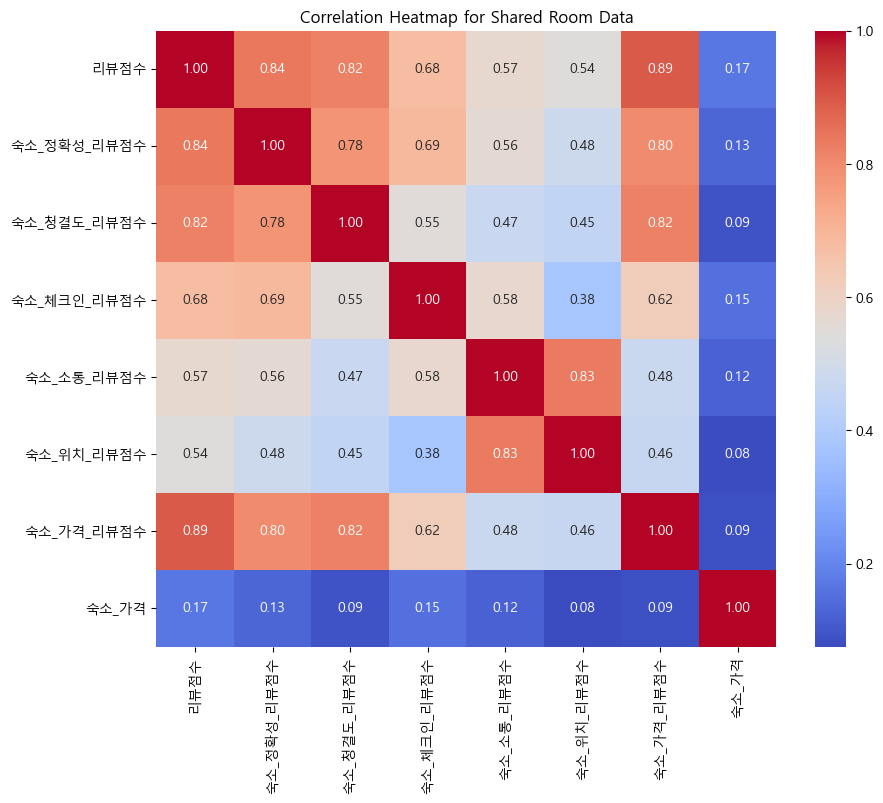

In [94]:
# 상관관계 계산
correlation_matrix = df_shared_room[['리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '숙소_가격']].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Shared Room Data")
plt.show()

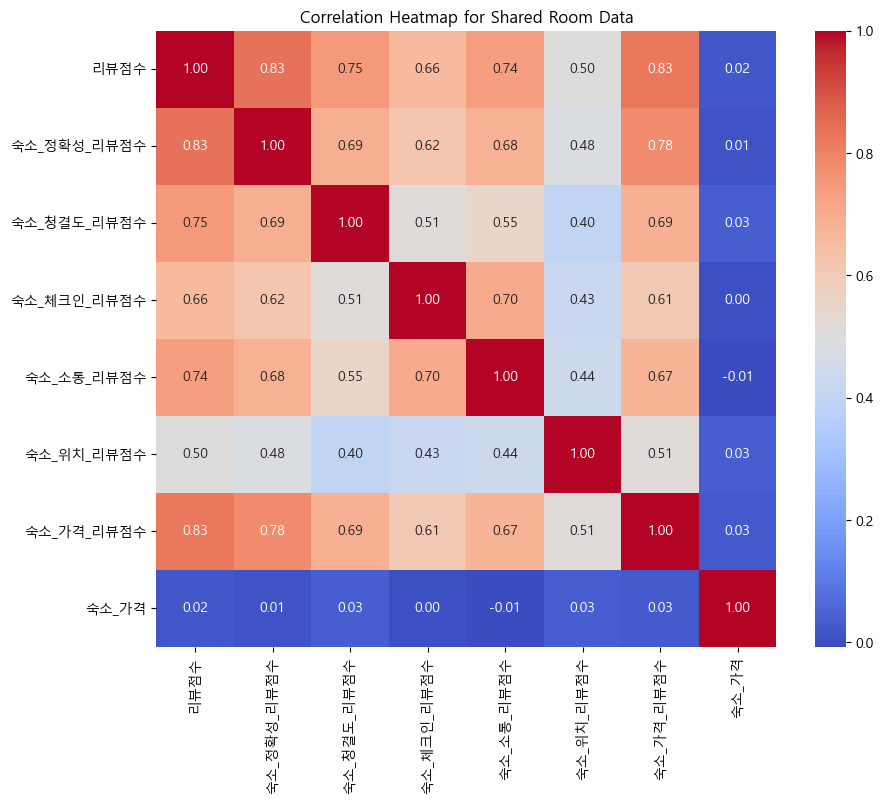

In [95]:
# 상관관계 계산
correlation_matrix = df_entire_home[['리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '숙소_가격']].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Shared Room Data")
plt.show()

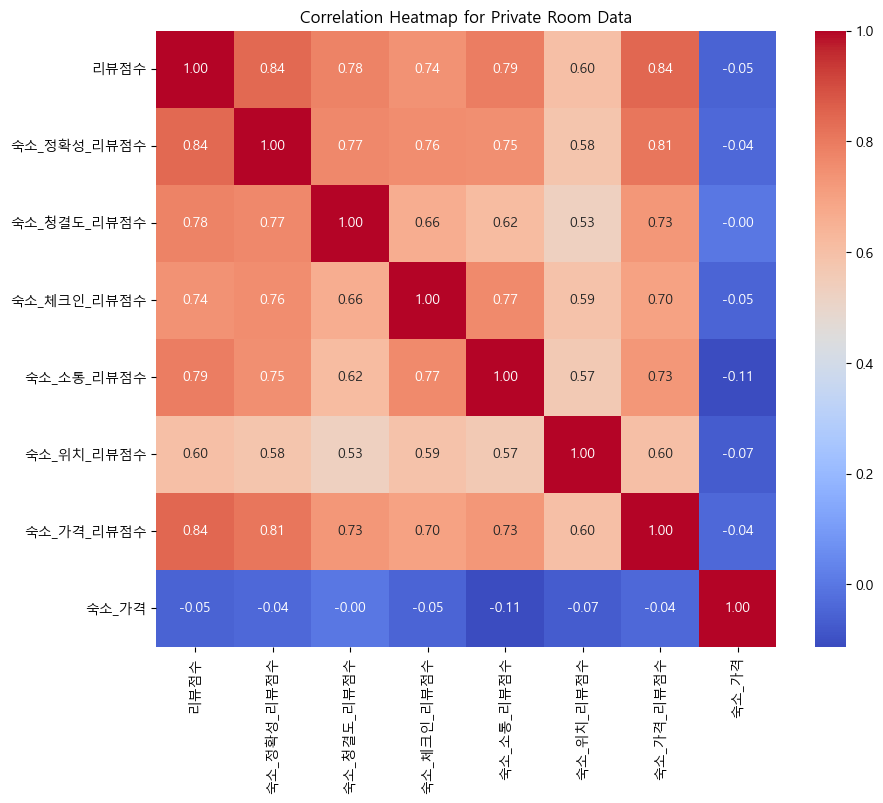

In [96]:
# 상관관계 계산
correlation_matrix = df_private_room[['리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '숙소_가격']].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Private Room Data")
plt.show()

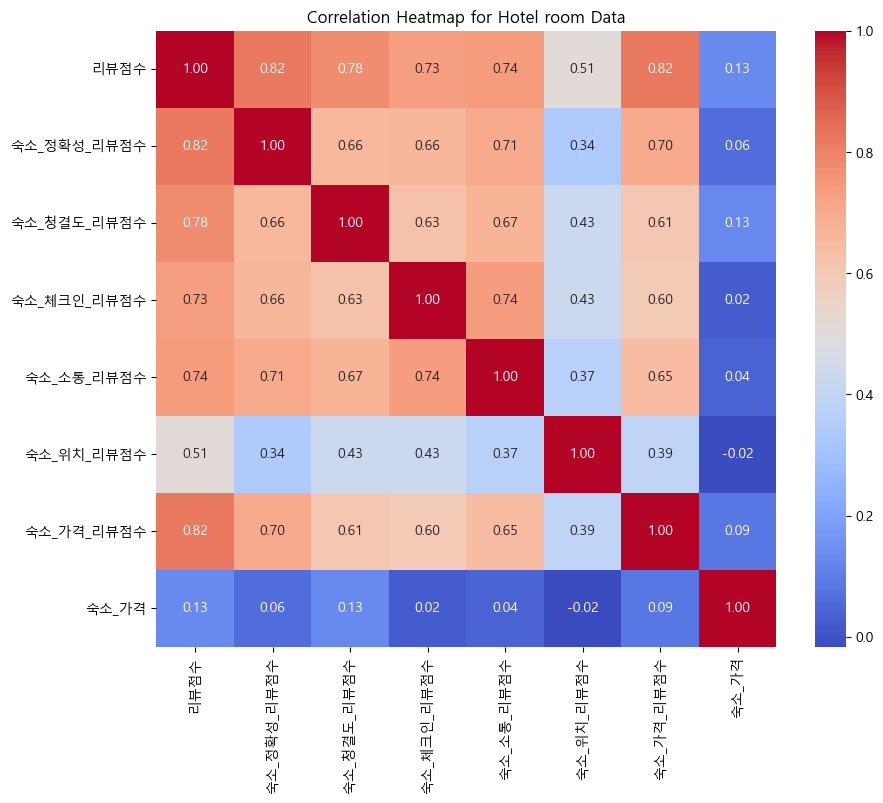

In [97]:
# 상관관계 계산
correlation_matrix = df_hotel_room[['리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '숙소_가격']].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Hotel room Data")
plt.show()

In [98]:
len(df['숙소_특징'].unique())

58

In [99]:
df['숙소_특징'].unique()

array(['Entire rental unit', 'Private room in guest suite',
       'Private room in rental unit', 'Entire condo', 'Entire loft',
       'Entire guesthouse', 'Private room in bed and breakfast',
       'Entire townhouse', 'Private room in townhouse',
       'Private room in condo', 'Entire home',
       'Entire serviced apartment', 'Tiny home', 'Private room in loft',
       'Shared room in rental unit', 'Floor', 'Room in bed and breakfast',
       'Private room in guesthouse', 'Private room in home', 'Houseboat',
       'Private room', 'Entire place', 'Entire guest suite',
       'Private room in tiny home', 'Room in boutique hotel',
       'Private room in earthen home', 'Room in serviced apartment',
       'Entire bed and breakfast', 'Boat', 'Cave',
       'Private room in villa', 'Room in hotel', 'Shared room in condo',
       'Shared room in tiny home', 'Shared room in loft',
       'Private room in serviced apartment', 'Shared room in farm stay',
       'Dome', 'Shared room in bed

In [100]:
filtered_df = df[df['숙소_특징'].str.contains('boat|cave', case=False, na=False)]

In [110]:
filtered_df[['침실수','침대수','욕실수','숙소_특징','url','숙소_가격','숙소_유형','숙소_지역']]

,침실수,침대수,욕실수,숙소_특징,url,숙소_가격,숙소_유형,숙소_지역
1863,4.0,4.0,3.0,Houseboat,https://www.airbnb.com/rooms/1942897,$420.00,Entire home/apt,Passy
4113,2.0,3.0,1.0,Boat,https://www.airbnb.com/rooms/4421966,$250.00,Entire home/apt,Palais-Bourbon
5610,1.0,NaN,NaN,Cave,https://www.airbnb.com/rooms/6389132,NaN,Entire home/apt,Passy
12284,1.0,NaN,NaN,Boat,https://www.airbnb.com/rooms/13761972,NaN,Entire home/apt,Gobelins
24898,3.0,1.0,2.0,Houseboat,https://www.airbnb.com/rooms/33218184,$245.00,Entire home/apt,Vaugirard
25479,1.0,3.0,1.0,Private room in boat,https://www.airbnb.com/rooms/34298068,$136.00,Private room,Reuilly
32303,3.0,3.0,1.5,Boat,https://www.airbnb.com/rooms/43696956,$750.00,Entire home/apt,Palais-Bourbon
34406,1.0,2.0,1.0,Boat,https://www.airbnb.com/rooms/47714862,$173.00,Entire home/apt,Passy
36558,2.0,3.0,2.0,Private room in boat,https://www.airbnb.com/rooms/51110755,$253.00,Private room,Reuilly
39656,2.0,2.0,1.0,Houseboat,https://www.airbnb.com/rooms/565659426199345896,$416.00,Entire home/apt,Louvre


In [111]:
filtered_df = df[df['숙소_유형'].str.contains('boat|cave', case=False, na=False)]

In [103]:
print(lower_bound,upper_bound,IQR,Q1,Q3)

-116739.99000000002 555026.9700000001 167941.74000000002 135172.62000000002 303114.36000000004


In [104]:
filtered_check1.sort_values(by='숙소_가격')[['숙소_id','숙소_가격','url']]

,숙소_id,숙소_가격,url
79487,1087465671624422127,10923.04,https://www.airbnb.com/rooms/1087465671624422127
36638,51429386,13653.80,https://www.airbnb.com/rooms/51429386
1475,1272342,13653.80,https://www.airbnb.com/rooms/1272342
34684,48802180,17749.94,https://www.airbnb.com/rooms/48802180
24747,33090506,24576.84,https://www.airbnb.com/rooms/33090506
...,...,...,...
40094,584475953034555732,552978.90,https://www.airbnb.com/rooms/584475953034555732
40018,580518515097114687,554344.28,https://www.airbnb.com/rooms/580518515097114687
59804,933379506615282407,554344.28,https://www.airbnb.com/rooms/933379506615282407
11878,13386198,554344.28,https://www.airbnb.com/rooms/13386198


In [105]:
len(check1)
2163/41615

0.05197645079899075

In [106]:
check1['숙소_특징'].value_counts()

숙소_특징
Entire rental unit                    34330
Private room in rental unit            2163
Entire condo                           1587
Entire loft                             651
Room in boutique hotel                  642
Room in hotel                           442
Private room in bed and breakfast       291
Entire home                             239
Entire serviced apartment               235
Private room in condo                   196
Entire townhouse                        167
Shared room in rental unit              108
Shared room in hostel                    63
Private room in townhouse                48
Private room in home                     42
Room in aparthotel                       41
Private room in hostel                   39
Private room in loft                     39
Entire vacation home                     33
Private room in casa particular          28
Entire place                             24
Private room in guest suite              22
Private room              

In [107]:
check1['숙소_유형'].value_counts()

숙소_유형
Entire home/apt    37366
Private room        3658
Hotel room           391
Shared room          200
Name: count, dtype: int64

In [108]:
check1[check1['숙소_특징']=='Entire bed and breakfast']

,숙소_id,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용인원수,욕실수,침실수,침대수,...,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,url,숙소_특징
3873,4189232,20891132,f,1.0,Palais-Bourbon,Entire home/apt,2,1.0,1.0,1.0,...,4.56,4.72,4.62,4.75,4.69,4.91,4.66,2.04,https://www.airbnb.com/rooms/4189232,Entire bed and breakfast


In [109]:
check1['리뷰수'].unique()

array([   4,  106,  393,   78,  348,  100,  111,  177,   86,    5,   61,
        206,    7,   24,  461,   64,   75,   59,  141,  137,  185,   49,
         52,   50,  287,   22,  210,   39,   37,   35,   30,  669,    9,
         62,  171,   82,  120,  121,   21,  230,  213,   60,    1,   98,
        250,   23,  186,  314,  165,    8,  151,   46,  133,  249,  158,
        202,  294,   34,  116,  277,  144,  453,   85,   10,  267,  153,
         40,  123,  253,  285,  126,  209,  132,  124,  119,   96,   92,
         27,   42,   67,  127,   41,  245,   69,  166,   56,   80,  371,
        215,  114,  143,   33,  419,   29,   90,  130,   47,  836,   84,
        307,    3,  197,   83,  554,  227,  176,   20,   36,   71,   17,
         88,   51,  135,  162,  161,  345,  142,  224,   77,  242,  303,
         70,   15,   31,  300,    2,    6,  163,   18,   87,  105,  262,
        269,  211,   58,  424,  560,  156,   14,  297,   13,  216,  219,
         19,  150,   12,   44,   38,  122,  422,  1